# KNN Classification
- K(개의) Nearest(근접) Neighbors(이웃)

새로운 점과 K개의 가장 가까운 점을 보고, 그에 따라 새로운 점을 분류

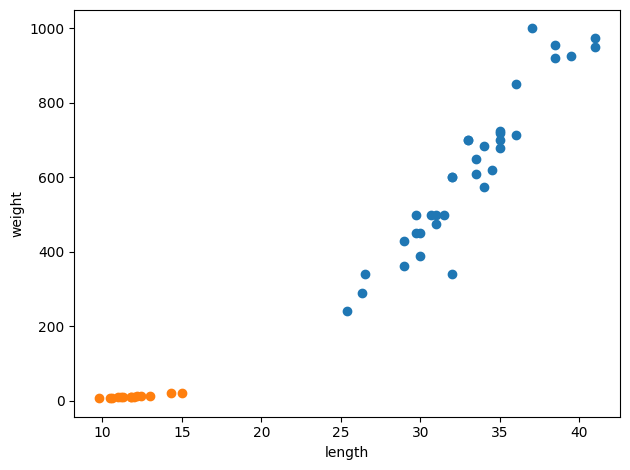

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# 생선 데이터(bream=도미, smelt=빙어)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.tight_layout()
plt.show()

In [2]:
df_bream = pd.DataFrame({
    'length': bream_length,
    'weight': bream_weight,
    'class' : [1] * len(bream_length)
})
df_smelt = pd.DataFrame({
    'length': smelt_length,
    'weight': smelt_weight,
    'class' : [0] * len(smelt_length)
})

df_fish = pd.concat([df_bream, df_smelt]).reset_index(drop=True)
# display(df_fish)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
X = df_fish[['length', 'weight']]  # 입력값, matrixlike(대문자로 표시)
y = df_fish['class']  # 타겟, vectorlike(소문자로 표시)
kn.fit(X, y)  # fit = 학습
# kn.score(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [4]:
kn.predict([[30, 600], [15, 100]])

array([1, 0])

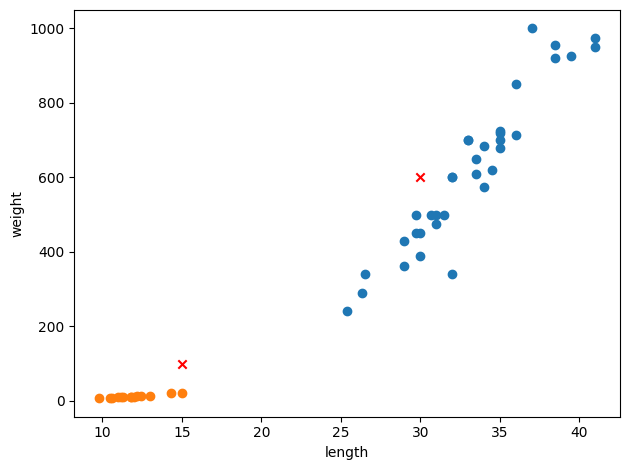

In [5]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30],[600], marker='x', color='red')
plt.scatter([15],[100], marker='x', color='red')
plt.xlabel('length')
plt.ylabel('weight')

plt.tight_layout()
plt.show()

## 지도학습(Supervised Learning) vs 비지도학습(Un-Supervised Learning)
지도학습 = X 입력(input), y 타겟(target) -> 훈련 데이터

ex) 생선데이터에서
- 입력: 길이특성, 무게특성
- 타겟: 0, 1
- 입력 + 타겟 = 훈련 데이터

생선데이터를 전부 훈련시켜서 만들면 훈련이 제대로 되었는지 확인이 불가능

-> 생선데이터의 일부를 훈련시키고, 나머지 데이터로 테스트를 돌림(나머지 데이터에는 답이 있으니까)

In [6]:
# neighbors 개수를 전체로 하면 결과가 도미 하나만 나옴 -> 뭐가 들어와도 도미라고 나온다 -> 도미 데이터만 정답으로 처리하게 됨
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(X, y)
kn49.score(X, y)

0.7142857142857143

In [7]:
# 샘플링 편향
# 도미 데이터로 학습을 돌리고, 빙어 데이터로 테스트를 돌린 경우
train_X = df_fish[['length','weight']][:35]
train_y = df_fish['class'][:35]
test_X = df_fish[['length','weight']][35:]
test_y = df_fish['class'][35:]

In [8]:
kn_sampling_bias = KNeighborsClassifier()
kn_sampling_bias.fit(train_X, train_y)  # 훈련데이터로 훈련
kn_sampling_bias.score(test_X, test_y)  # 테스트 데이터로 점수를 매김 -> 점수는 0점

0.0

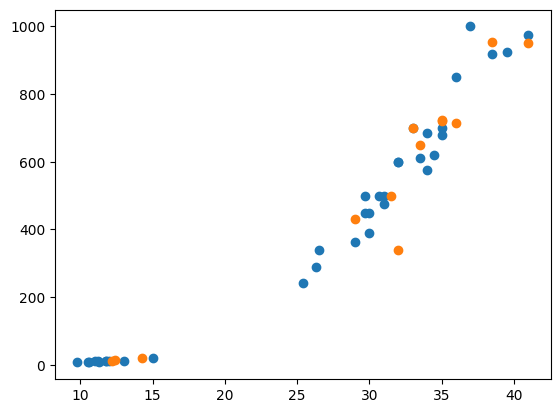

In [9]:
# 훈련/테스트를 나누는 기준이 필요(그냥 자르는건 안됨) -> 모듈에서 알아서 해줌
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

plt.scatter(train_X['length'], train_X['weight'])
plt.scatter(test_X['length'], test_X['weight'])
plt.show()

In [10]:
kn.fit(train_X, train_y)
kn.score(test_X, test_y)  # 이건 의미가 있는 점수

1.0

In [11]:
# 스케일링
kn.predict([[25, 150]])  # 0은 빙어, 실제로는 도미
distances, indexes = kn.kneighbors([[25, 150]])

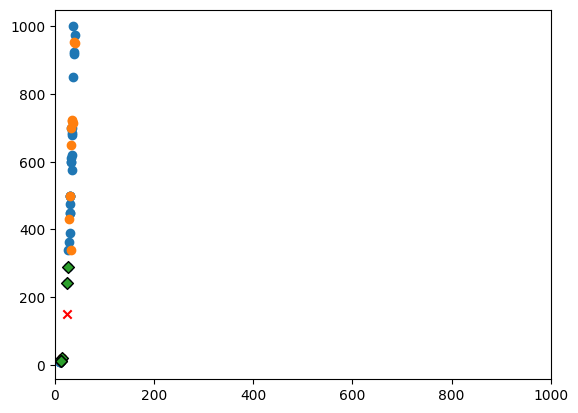

In [12]:
plt.scatter(train_X['length'], train_X['weight'])
plt.scatter(test_X['length'], test_X['weight'])
plt.scatter([25], [150], marker='x', color='red')
plt.scatter(train_X.iloc[indexes[0]]['length'], train_X.iloc[indexes[0]]['weight'], edgecolors='black', marker='D')  # 가깝다고 판단한 친구들 -> 스케일링 문제

# 길이는 cm단위(최대 40cm), 무게는 g단위(최대 1000g) -> 둘다 그냥 숫자로 받아서 문제가 생기는 것
plt.xlim((0, 1000))

plt.show()

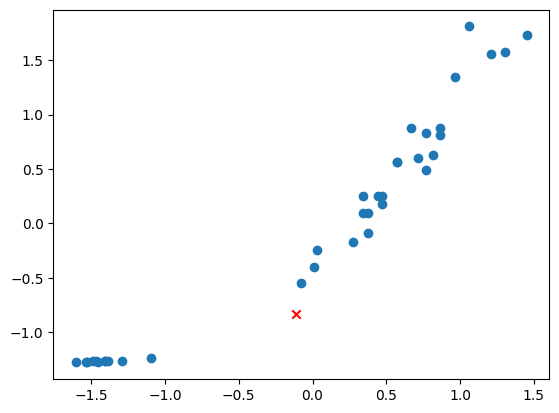

In [13]:
# 스케일링 문제 -> 정규화 시켜서 해결

mean = np.mean(train_X, axis=0)  # 훈련 데이터의 평균
std = np.std(train_X, axis=0)  # 훈련 데이터의 표준편차
scaled_train_X = (train_X - mean) / std
new = ([25, 150] - mean) / std  # 훈련 데이터, 목표 데이터를 표준화

plt.scatter(scaled_train_X[:]['length'], scaled_train_X[:]['weight'])
plt.scatter(new[0], new[1], marker='x', color='red')
plt.show()

In [14]:
# Z-Score로 바꾸고 학습, 평가
kn.fit(scaled_train_X, train_y)
scaled_test_X = (test_X - mean) / std  # 테스트 데이터를 정규화 할때 훈련 데이터의 평균/표준편차를 이용함 -> 애초에 학습할 때 훈련 데이터의 평균/표준편차를 이용해서
kn.score(scaled_test_X, test_y) 

1.0

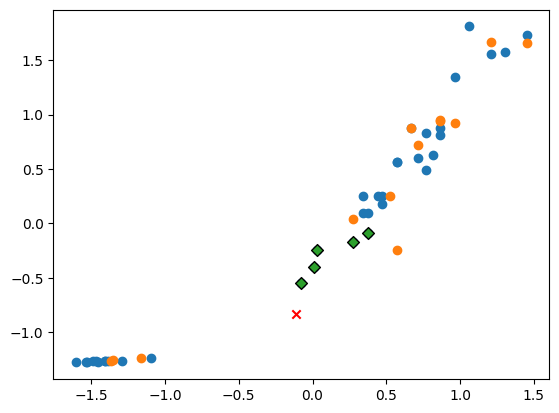

In [15]:
dist, indexes = kn.kneighbors([new])

plt.scatter(scaled_train_X['length'], scaled_train_X['weight'])
plt.scatter(scaled_test_X['length'], scaled_test_X['weight'])
plt.scatter(new[0], new[1], marker='x', color='red')
plt.scatter(scaled_train_X.iloc[indexes[0]]['length'], scaled_train_X.iloc[indexes[0]]['weight'], edgecolors='black', marker='D')

plt.show()